In [ ]:
import sys; sys.path.insert(0, '..')
import os
from io import BytesIO
import time
import pandas as pd
from matplotlib.figure import SubplotParams
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from tabulate import tabulate
from dataclasses import dataclass
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.optimizers import RMSprop, Adam
from keras.losses import CategoricalCrossentropy
from keras import activations
from sklearn.metrics import confusion_matrix
from utils.df_utils import df_wrapper
sns.set()

In [ ]:
POSE_MAP = {
    "rett": 0,
    "fram": 1,
    "fram-hoyre": 2,
    "hoyre": 3,
    "bak-hoyre": 4,
    "bak": 5,
    "bak-venstre": 6,
    "venstre": 7,
    "fram-venstre": 8
}

@dataclass
class training_class:
    csv_file: str
    annot_file: str

@dataclass
class testing_class:
    csv_file: str
    annot_file: str

In [ ]:
training_files = {
    "001": training_class("../../data/train_data/001_train_3_030221.csv",
                             "../../data/annotation/training/001_train_3_030221.txt"),
    "002": training_class("../../data/train_data/002_train_3_080221.csv",
                            "../../data/annotation/training/002_train_3_080221.txt"),
    "003": training_class("../../data/train_data/003_train_3_080221.csv",
                            "../../data/annotation/training/003_train_3_080221.txt"),
    "004": training_class("../../data/train_data/004_train_3_110221.csv",
                               "../../data/annotation/training/004_train_3_110221.txt"),
    "005": training_class("../../data/train_data/005_train_3_090221.csv",
                            "../../data/annotation/training/005_train_3_090221.txt"),
    "006": training_class("../../data/train_data/006_train_3_110221.csv",
                              "../../data/annotation/training/006_train_3_110221.txt"),
    "007": training_class("../../data/train_data/007_train_3_030321.csv",
                        "../../data/annotation/training/007_train_3_030321.txt"),
    "008": training_class("../../data/train_data/008_train_3_030321.csv",
                        "../../data/annotation/training/008_train_3_030321.txt"),
    "009": training_class("../../data/train_data/009_train_3_120421.csv",
                          "../../data/annotation/training/009_train_3_120421.txt"),
    "010": training_class("../../data/train_data/010_train_3_220421.csv",
                          "../../data/annotation/training/010_train_3_220421.txt"),
}

In [ ]:
testing_files = {
    "001": testing_class("../../data/test_data/001_test_3_100521.csv",
                            "../../data/annotation/testing/001_test_3_100521.txt"),
    "002": testing_class("../../data/test_data/002_test_3_140421.csv",
                          "../../data/annotation/testing/002_test_3_140421.txt"),
    "003": testing_class("../../data/test_data/003_test_3_120521.csv",
                         "../../data/annotation/testing/003_test_3_120521.txt"),
    "004": testing_class("../../data/test_data/004_test_3_110221.csv",
                              "../../data/annotation/testing/004_test_3_110221.txt"),
    "005": testing_class("../../data/test_data/005_test_3_090221.csv",
                           "../../data/annotation/testing/005_test_3_090221.txt"),
    "006": testing_class("../../data/test_data/006_test_3_110221.csv",
                             "../../data/annotation/testing/006_test_3_110221.txt"),
    "007": testing_class("../../data/test_data/007_test_3_030321.csv",
                        "../../data/annotation/testing/007_test_3_030321.txt"),
    "008": testing_class("../../data/test_data/008_test_3_120521.csv",
                       "../../data/annotation/testing/008_test_3_120521.txt"),
    "009": testing_class("../../data/test_data/009_test_3_120421.csv",
                          "../../data/annotation/testing/009_test_3_120421.txt"),
    "010": testing_class("../../data/test_data/010_test_3_220421.csv",
                        "../../data/annotation/testing/010_test_3_220421.txt"),
}

In [ ]:
AMOUNT_OF_SENSORS = 3
VALIDATION_TESTSET = "004"

In [ ]:
x_train_arr = []
for key in training_files:
    elem = df_wrapper(training_files[key].csv_file)
    elem.concat_sensor_data(AMOUNT_OF_SENSORS)
    elem.align_poses(training_files[key].annot_file, POSE_MAP)
    x_train_arr.append(elem)

x_train = pd.concat([x.df.drop([' TimeStamp (s)', 'Pose'],axis=1) for x in x_train_arr])

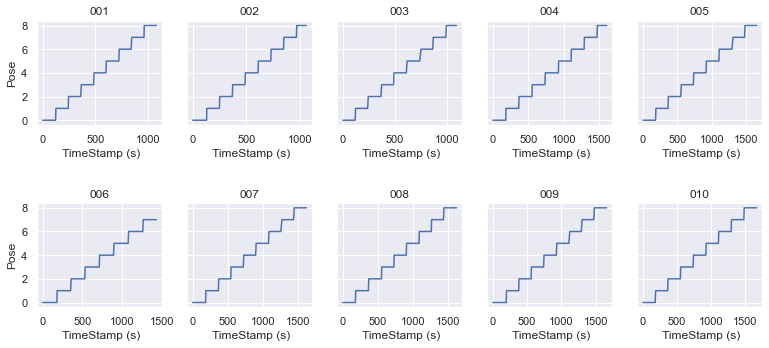

In [ ]:
# figsize = A4 format 8,27 x 13
fig, axes = plt.subplots(2, 5, figsize=(13, 5.27), sharex=False, sharey=True)

#params = fig.SubplotParams(wspace=2.5)
fig.subplots_adjust(hspace=0.75)
names = ["001","002","003","004","005","006","007","008","009","010"]

k = 0

for i in range(2):
    for j in range(5):
        axes[i][j].set_yticks(np.arange(0, 9, step=2))
        axes[i][j].set_xticks(np.arange(0, 1600, step=500))
        axes[i][j].set_title(names[k])
        sns.lineplot(ax=axes[i][j], x=x_train_arr[k].df[" TimeStamp (s)"], y=x_train_arr[k].df["Pose"], palette='flare')
        k += 1

plt.show()

In [ ]:
fig.savefig(fname="training_data.png", pad_inches=0.0, bbox_inches="tight")

In [ ]:
x_test_arr = []
for key in testing_files:
    elem = df_wrapper(testing_files[key].csv_file)
    elem.concat_sensor_data(AMOUNT_OF_SENSORS)
    elem.align_poses(testing_files[key].annot_file, POSE_MAP)
    x_test_arr.append(elem.df)


KeyboardInterrupt: 

10


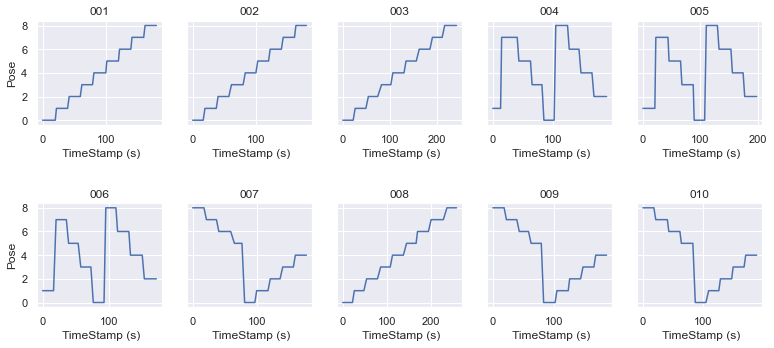

In [ ]:
# figsize = A4-ish format, rows = 2, columns = 5

fig, axes_test = plt.subplots(2, 5, figsize=(13, 5.27), sharex=False, sharey=True)

#params = fig.SubplotParams(wspace=2.5)
fig.subplots_adjust(hspace=0.75)
names = ["001","002","003","004","005","006","007","008","009","010"]

k = 0
print(len(x_test_arr))

for i in range(2):
    for j in range(5):
        axes_test[i][j].set_yticks(np.arange(0, 9, step=2))
        axes_test[i][j].set_title(names[k])
        if k == len(x_test_arr):
            break
        else:
            sns.lineplot(ax=axes_test[i][j], x=x_test_arr[k][" TimeStamp (s)"], y=x_test_arr[k]["Pose"], palette='flare')
            k += 1

plt.show()

In [ ]:
fig.savefig(fname="testing_data.png", pad_inches=0.0, bbox_inches="tight")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=59d486bc-e14d-4632-9064-12272fc72d11' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>